In [1]:
import numpy
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
from ..features import build_features

Loading modules and setting up notebook

In [2]:
%xmode Verbose 
%load_ext line_profiler 
%load_ext memory_profiler

Exception reporting mode: Verbose


Loading Dataset

In [3]:
news_applications = pickle.load(open("../../data/raw_data/compressed_data.pkl", mode='rb')) 

In [4]:
news_applications

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [5]:
news_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [6]:
news_applications['category'] = news_applications['category'].apply(lambda item: item.lower())

Memory metrics

In [7]:
%memit news_applications

peak memory: 296.27 MiB, increment: 0.03 MiB


Exploring dataset

In [8]:
news_applications.isna().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [9]:
news_applications['category'].unique()

array(['u.s. news', 'comedy', 'parenting', 'world news', 'culture & arts',
       'tech', 'sports', 'entertainment', 'politics', 'weird news',
       'environment', 'education', 'crime', 'science', 'wellness',
       'business', 'style & beauty', 'food & drink', 'media',
       'queer voices', 'home & living', 'women', 'black voices', 'travel',
       'money', 'religion', 'latino voices', 'impact', 'weddings',
       'college', 'parents', 'arts & culture', 'style', 'green', 'taste',
       'healthy living', 'the worldpost', 'good news', 'worldpost',
       'fifty', 'arts', 'divorce'], dtype=object)

Handling categories

In [10]:
# Analyzing which categories can be merged 


In [11]:
news_applications['category'] = news_applications['category'].replace(
    {
        "culture & arts": "arts & culture",
        "arts": "arts & culture",
        "the worldpost": "world news",
        "worldpost": "world news",
        "parents": "parenting",
        "style": "style & beauty",
        "black voices": "voices",
        "latino voices": "voices",
        "queer voices": "voices",
    }
)


In [12]:
news_per_cat = news_applications.groupby("category").agg(total_posts=('category','count')).reset_index().sort_values('total_posts', ascending=False)

In [13]:
news_per_cat

,category,total_posts
19,politics,35602
31,wellness,17945
7,entertainment,17362
18,parenting,12746
23,style & beauty,12068
28,voices,12060
26,travel,9900
33,world news,9542
13,healthy living,6694
10,food & drink,6340


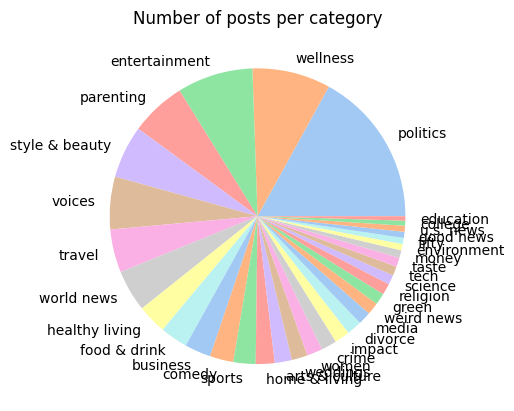

In [14]:
colors = sns.color_palette('pastel')[:news_per_cat['category'].shape[0]]
plt.pie(news_per_cat['total_posts'], labels=news_per_cat['category'], colors=colors)
plt.title("Number of posts per category")

In [15]:
news_applications['link'] = news_applications['link'].apply(lambda item: item.strip("https://").split("/")[2])

In [16]:
news_applications.rename(columns={'link': 'link_shortage'}, inplace=True)

In [17]:
news_applications

,link_shortage,headline,category,short_description,authors,date
0,covid-boosters-uptake-us_n_632d719ee4b087fae6f...,Over 4 Million Americans Roll Up Sleeves For O...,u.s. news,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,american-airlines-passenger-banned-flight-atte...,"American Airlines Flyer Charged, Banned For Li...",u.s. news,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,funniest-tweets-cats-dogs-september-17-23_n_63...,23 Of The Funniest Tweets About Cats And Dogs ...,comedy,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,funniest-parenting-tweets_l_632d7d15e4b0d12b54...,The Funniest Tweets From Parents This Week (Se...,parenting,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,amy-cooper-loses-discrimination-lawsuit-frankl...,Woman Who Called Cops On Black Bird-Watcher Lo...,u.s. news,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,rim-ceo-thorsten-heins_us_5bb34b8ce4b0fa920b95...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,tech,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,maria-sharapova-stunned-victoria-azarenka-aust...,Maria Sharapova Stunned By Victoria Azarenka I...,sports,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,super-bowl-upsets-the-mos_us_5bb69b1de4b097869...,"Giants Over Patriots, Jets Over Colts Among M...",sports,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,aldon-smith-arrested-dui-49ers_us_5bb69b25e4b0...,Aldon Smith Arrested: 49ers Linebacker Busted ...,sports,CORRECTION: An earlier version of this story i...,,2012-01-28


Removing numbers from headlines and descriptions as they bring noise in our document

In [18]:
def replace_numbers(headline):
    """
    Function removes all numbers from string
    """
    splitted_headline = numpy.array(headline.split(" "))
    return ' '.join(numpy.where(numpy.char.isdigit(splitted_headline), "", splitted_headline))

news_applications['headline'] = news_applications['headline'].apply(
    func=replace_numbers
) 

news_applications['short_description'] = news_applications['short_description'].apply(
    func=replace_numbers
)

In [19]:
news_applications

,link_shortage,headline,category,short_description,authors,date
0,covid-boosters-uptake-us_n_632d719ee4b087fae6f...,Over Million Americans Roll Up Sleeves For Om...,u.s. news,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,american-airlines-passenger-banned-flight-atte...,"American Airlines Flyer Charged, Banned For Li...",u.s. news,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,funniest-tweets-cats-dogs-september-17-23_n_63...,Of The Funniest Tweets About Cats And Dogs Th...,comedy,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,funniest-parenting-tweets_l_632d7d15e4b0d12b54...,The Funniest Tweets From Parents This Week (Se...,parenting,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,amy-cooper-loses-discrimination-lawsuit-frankl...,Woman Who Called Cops On Black Bird-Watcher Lo...,u.s. news,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,rim-ceo-thorsten-heins_us_5bb34b8ce4b0fa920b95...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,tech,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,maria-sharapova-stunned-victoria-azarenka-aust...,Maria Sharapova Stunned By Victoria Azarenka I...,sports,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,super-bowl-upsets-the-mos_us_5bb69b1de4b097869...,"Giants Over Patriots, Jets Over Colts Among M...",sports,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,aldon-smith-arrested-dui-49ers_us_5bb69b25e4b0...,Aldon Smith Arrested: 49ers Linebacker Busted ...,sports,CORRECTION: An earlier version of this story i...,,2012-01-28


Let's find average description 

Let's find top frequent words per category 

In [20]:
unique_categories = news_applications['category'].unique()

In [29]:
most_freq_descript_words = build_features.get_most_frequent_description_words(unique_categories, news_applications)

In [30]:
print(most_freq_descript_words)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Let's find most frequent word in headlines per category

In [32]:
most_freq_headline_words = build_features.get_most_frequent_headline_words(unique_categories, news_applications)

In [33]:
most_freq_headline_words

{'u.s. news': ['000',
  '000 alleged',
  '000 alleged child',
  '000 allowing',
  '000 allowing proxy'],
 'comedy': ['000',
  '000 bees',
  '000 firecrackers',
  '000 firecrackers make',
  '000 good'],
 'parenting': ['000',
  '000 000',
  '000 000 video',
  '000 airline',
  '000 airline miles'],
 'world news': ['000',
  '000 berlin',
  '000 berlin protested',
  '000 brazilians',
  '000 brazilians curse'],
 'arts & culture': ['000',
  '000 000',
  '000 000 listens',
  '000 auction',
  '000 epic'],
 'tech': ['000',
  '000 accounts',
  '000 accounts accessed',
  '000 amid',
  '000 amid pc'],
 'sports': ['00', '00 era', '000', '000 bottles', '000 bottles water'],
 'entertainment': ['000',
  '000 aclu',
  '000 aclu donations',
  '000 anti',
  '000 anti hate'],
 'politics': ['000',
  '000 acres',
  '000 acres bees',
  '000 advise',
  '000 advise time'],
 'weird news': ['000',
  '000 bees',
  '000 bees leave',
  '000 calorie',
  '000 calorie cake'],
 'environment': ['000',
  '000 docking',
  

Let's find average length for headline and description for each category

In [ ]:
averages = build_features.construct_average_headline_and_description_lengths(
    news_applications=news_applications
)

In [ ]:
averages

Let's find the most frequent day of the week to publish article for each category

In [34]:

news_applications = build_features.construct_popular_weekday(news_applications)


SyntaxError: unexpected EOF while parsing (2669700881.py, line 17)

In [25]:
news_applications

,link_shortage,headline,category,short_description,authors,date,headline_len,description_len,weekday,popular_weekday
0,covid-boosters-uptake-us_n_632d719ee4b087fae6f...,Over Million Americans Roll Up Sleeves For Om...,u.s. news,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,11,29,4,6
1,american-airlines-passenger-banned-flight-atte...,"American Airlines Flyer Charged, Banned For Li...",u.s. news,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,13,28,4,6
2,amy-cooper-loses-discrimination-lawsuit-frankl...,Woman Who Called Cops On Black Bird-Watcher Lo...,u.s. news,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,11,25,3,6
3,belk-worker-found-dead-columbiana-centre-bathr...,Cleaner Was Dead In Belk Bathroom For Days Be...,u.s. news,The 63-year-old woman was seen working at the ...,,2022-09-22,13,26,3,6
4,reporter-gets-adorable-surprise-from-her-boyfr...,Reporter Gets Adorable Surprise From Her Boyfr...,u.s. news,"""Who's that behind you?"" an anchor for New Yor...",Elyse Wanshel,2022-09-22,11,20,3,6
...,...,...,...,...,...,...,...,...,...,...
209522,unioncity.patch.com,"Local Mom Gives A ""Hand Up"" To Single Mothers",divorce,"Tricia Ward, 40, was a successful real estate ...",,2012-01-30,9,21,0,4
209523,washingtonexaminer.com,Fathers Challenge Jail Sentences For Child Sup...,divorce,After Lance Hendrix returned from military ser...,,2012-01-30,7,20,0,4
209524,www.miamiherald.com,Tips To Help Your Dog Deal With Divorce,divorce,"Breaking up is hard to do, and when the family...",,2012-01-30,8,22,0,4
209525,finding-love-again-advice_us_5b9b3fa3e4b03a1dc...,Finding Love Again: Advice for the Divorced Woman,divorce,The legal freedom that comes from a divorce de...,"Dr. Janet Page, Contributor\nPsychotherapist, ...",2012-01-30,8,26,0,4


Let's visualize what days are the most popular for people to post topics per category

<Axes: xlabel='weekday', ylabel='count'>

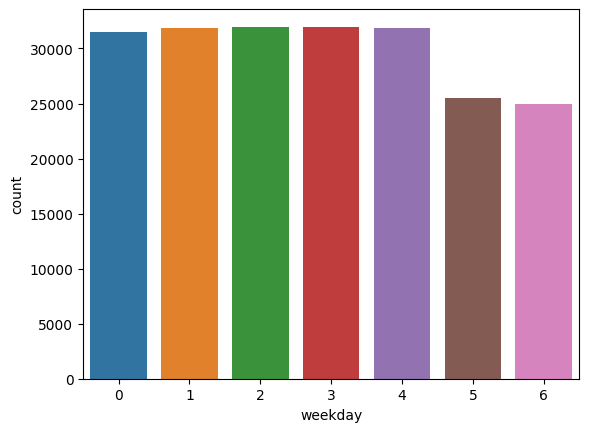

In [32]:
sns.countplot(x=news_applications['weekday'])